In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import re
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
from collections import Counter
from sklearn.decomposition import PCA
from sklearn import linear_model

%matplotlib inline

In [2]:
df = pd.read_csv("FINAL_DF.csv")

In [3]:
df = df.iloc[:,1:]  ## ignoring double index

## Scatter plots

In [4]:
col_names = ['Common Dolphin','Bottlenose Dolphin','Pacific White sided Dolphin',
             'Rissos Dolphin', 'Whales', 'Gray Whales']

In [5]:
def scatter_Temp(df, col_names):
    
    colors = plt.rcParams["axes.prop_cycle"]()

    for i,col in enumerate (col_names):
        plt.scatter(x=df['Avg Temp (C)'],y=df[col], c = next(colors)["color"], marker = 's',label = col)
        plt.legend(numpoints = 5, loc = 5 )
        plt.xlabel('Avg Temp (C)')
        plt.ylabel('amount')

        plt.show()

In [6]:
def scatter_Wind(df, col_names):
  
    colors = plt.rcParams["axes.prop_cycle"]()

    for i,col in enumerate (col_names):
        plt.scatter(x=df['Avg Wind Speed (M/S)'],y=df[col], c = next(colors)["color"], marker = 's',label = col)
        plt.legend(numpoints = 5, loc = 5 )
        plt.xlabel('Avg Wind Speed (M/S)')
        plt.ylabel('amount')

        plt.show()       

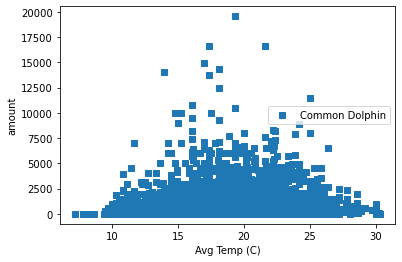

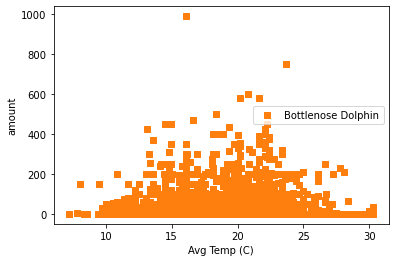

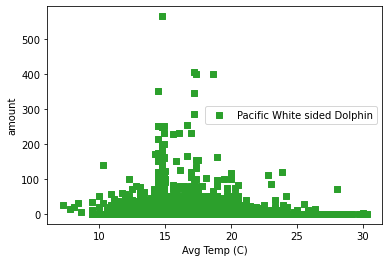

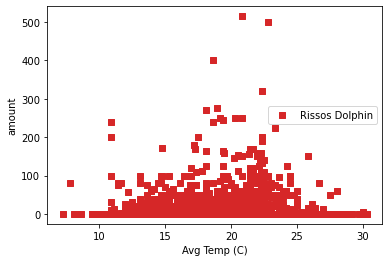

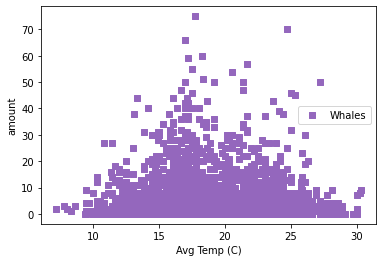

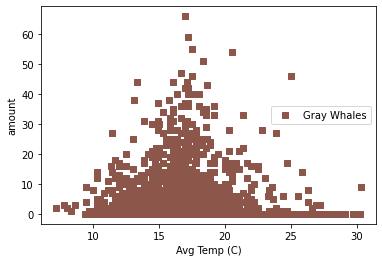

In [7]:
scatter_Temp(df, col_names)

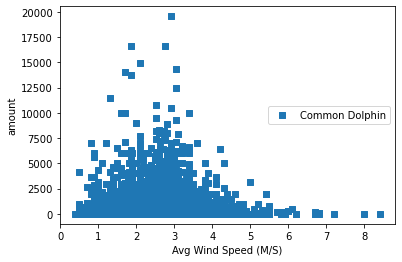

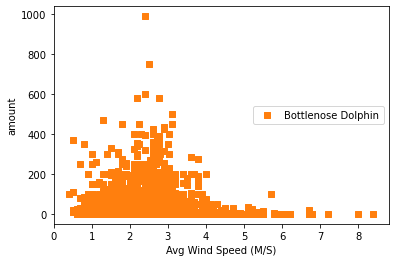

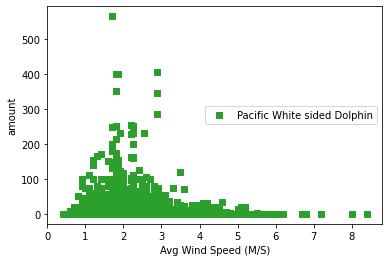

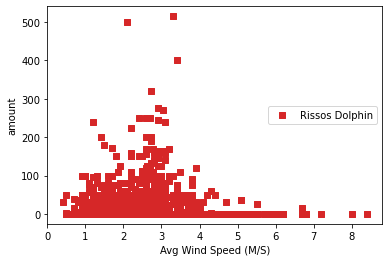

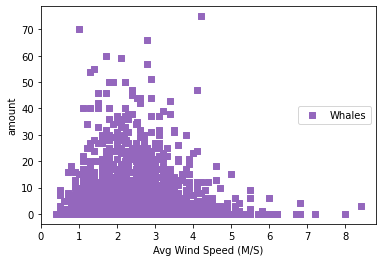

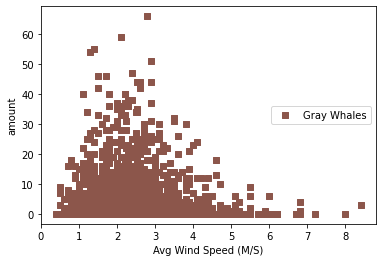

In [8]:
scatter_Wind(df, col_names)

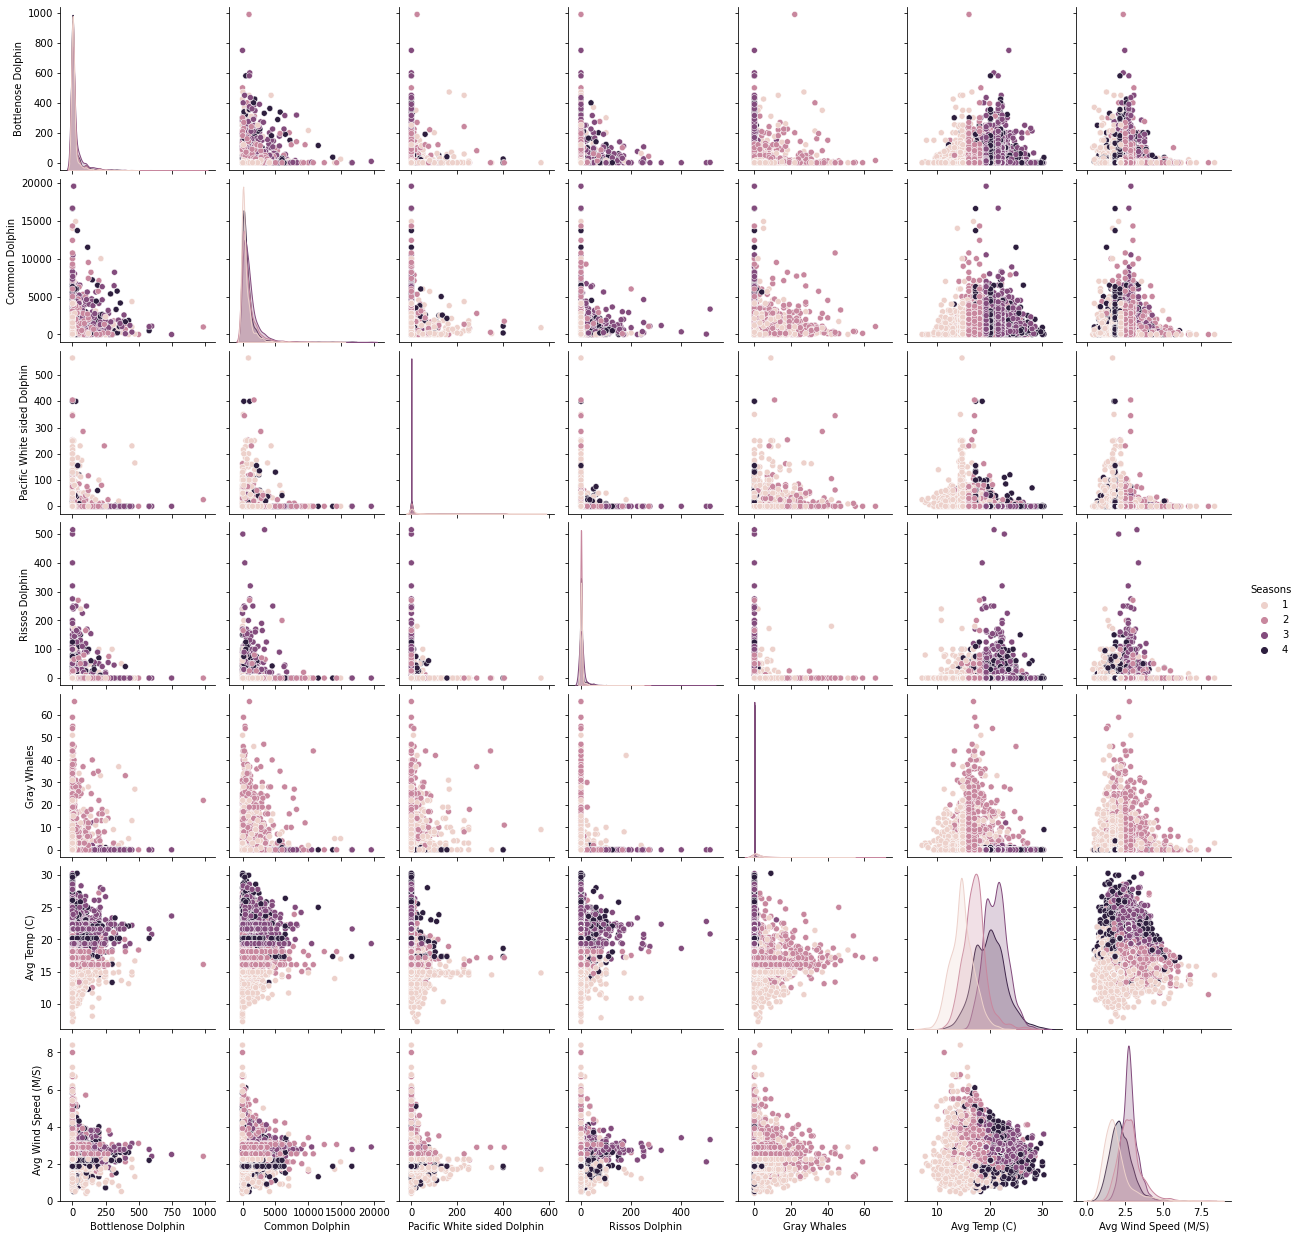

In [10]:
## Pair Plot
## 1 - Winter, 2 - Spring
## 3 - Summer, 4- Fall
sns.pairplot(df, hue="Seasons", vars = ['Bottlenose Dolphin', 'Common Dolphin', 'Pacific White sided Dolphin',
                                        'Rissos Dolphin', 'Gray Whales', 'Avg Temp (C)', 'Avg Wind Speed (M/S)'])

## Line Plots

In [17]:
def line_plot_animals_by_year(df,col_names):
    
    colors = plt.rcParams["axes.prop_cycle"]()
    for i, col in enumerate (col_names):
        newdf = df.groupby('Year')[col].sum()
        newdf.plot(kind = 'line',figsize=(15,3), color = next(colors)["color"])
        plt.title(col + ' per year')
        plt.savefig(f'{[col]}_per_year.png')    
        plt.show()
    
def line_plot_animals_by_month(df,col_names):
    
    colors = plt.rcParams["axes.prop_cycle"]()
    for i, col in enumerate (col_names):
        newdf = df.groupby('Months')[col].sum()
        newdf.plot(kind='line',figsize=(15,3), color= next(colors)["color"])
        plt.title(col + ' per year')
        plt.savefig(f'{[col]}_per_month.png')
        plt.show()


def line_plot_animals_by_temp(df, col_names):
    
    colors = plt.rcParams["axes.prop_cycle"]()
    for i, col in enumerate (col_names):
        newdf = df.groupby('Avg Temp (C)')[col].sum()
        newdf.plot(kind='line',figsize=(15,3), color= next(colors)["color"])
        plt.title(col + ' per year')
        plt.savefig(f'{[col]}_by_Temp.png')  
        plt.show()
    
    
def line_plot_animals_by_wind(df, col_names):
    
    colors = plt.rcParams["axes.prop_cycle"]()
    for i, col in enumerate (col_names):
        newdf = df.groupby('Avg Wind Speed (M/S)')[col].sum()
        newdf.plot(kind='line',figsize=(15,3), color= next(colors)["color"])
        plt.title(col + ' per year')
        plt.savefig(f'{[col]}_by_Wind.png')  
        plt.show()
        

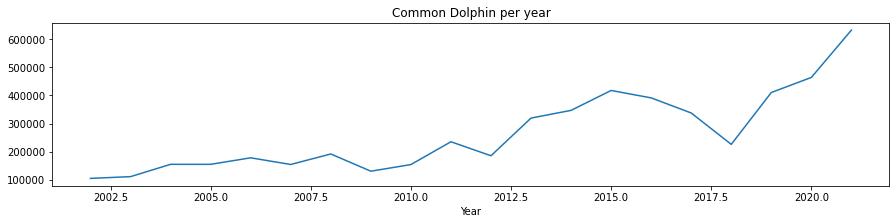

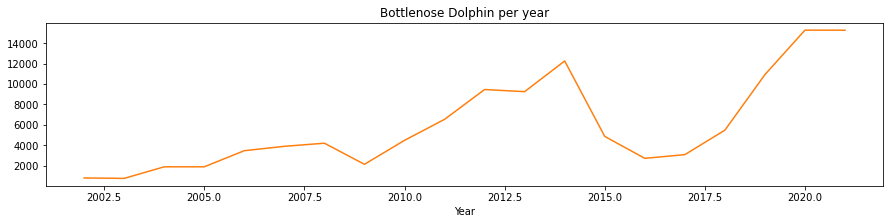

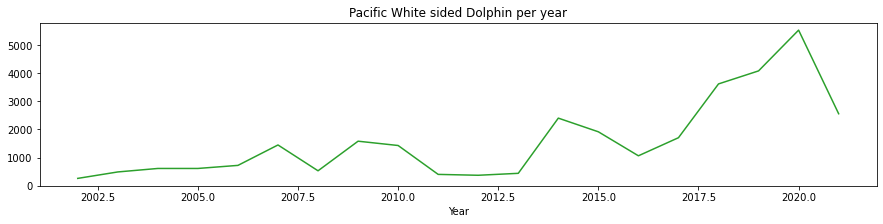

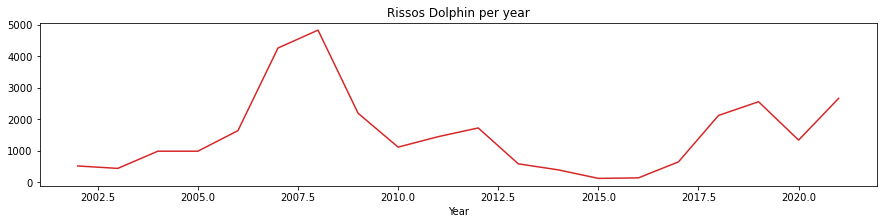

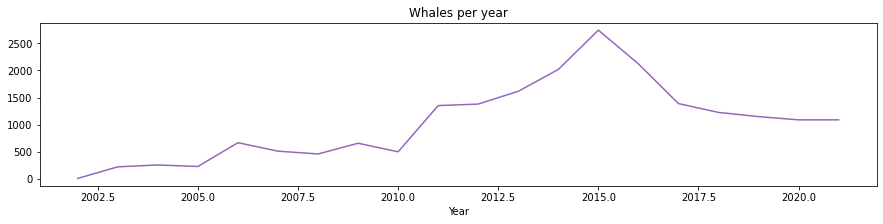

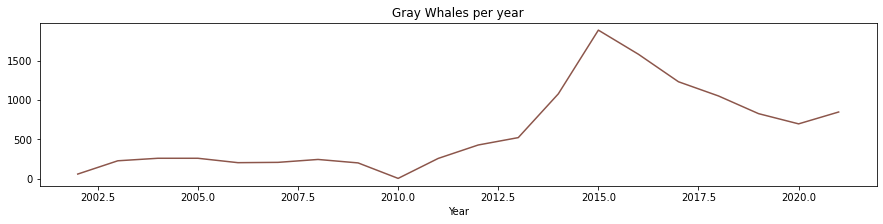

In [18]:
line_plot_animals_by_year(df,col_names)

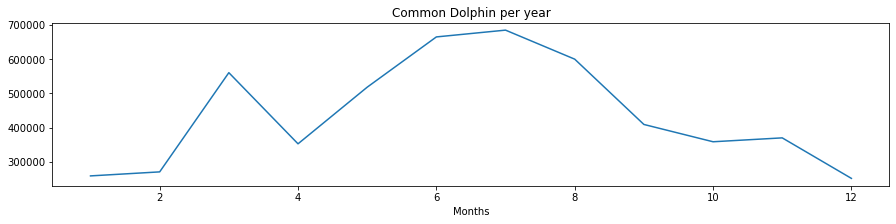

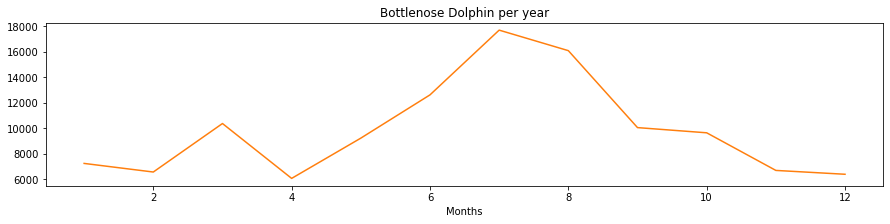

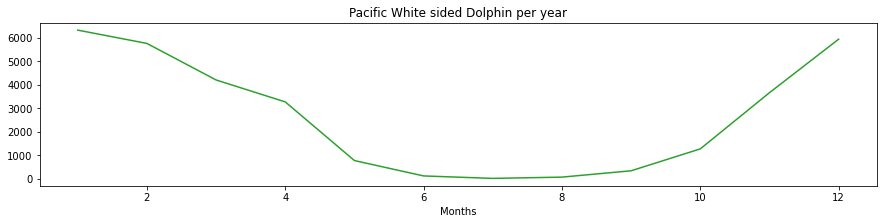

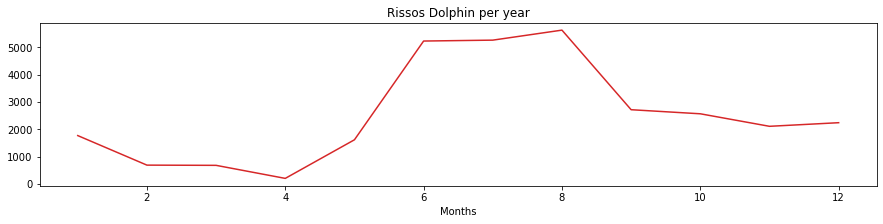

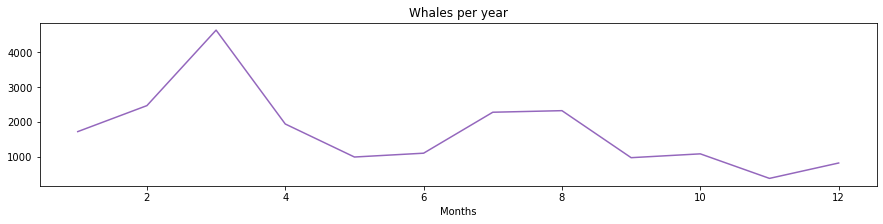

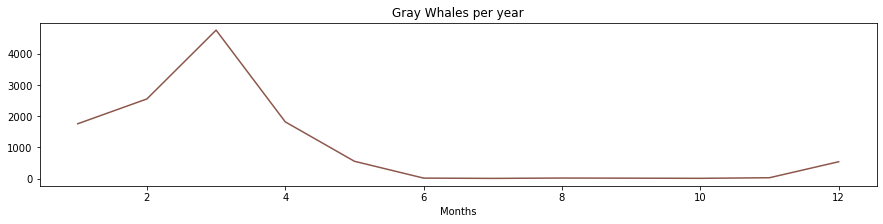

In [19]:
line_plot_animals_by_month(df,col_names)

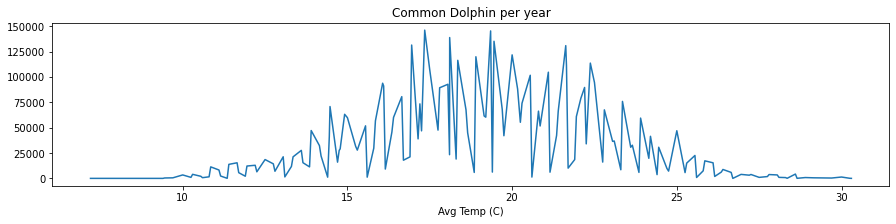

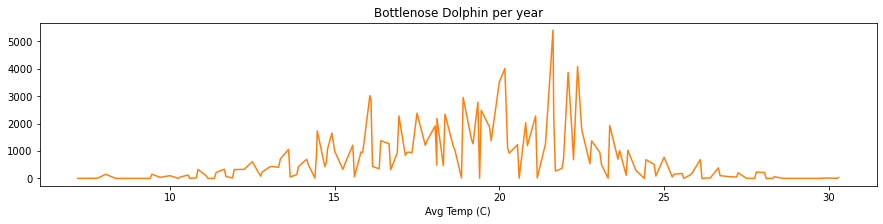

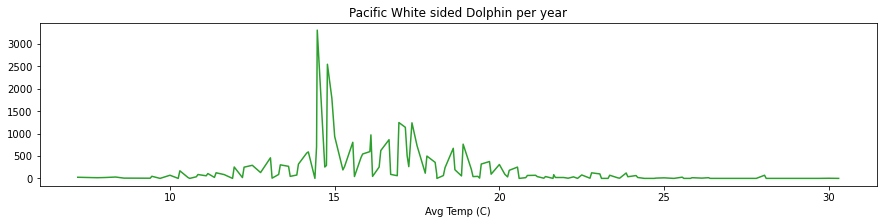

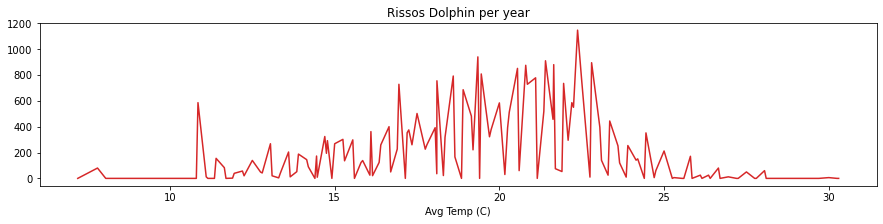

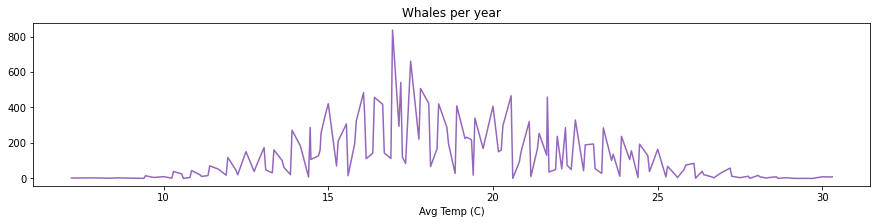

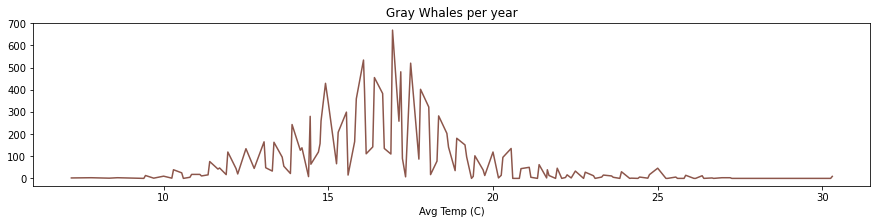

In [20]:
line_plot_animals_by_temp(df, col_names)

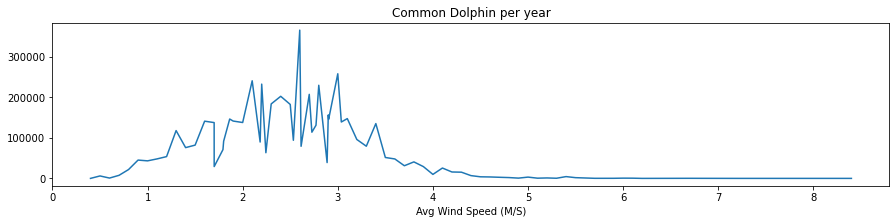

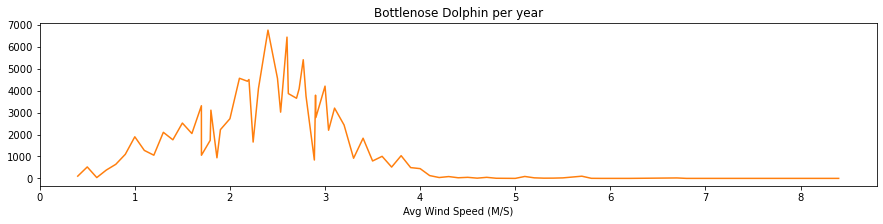

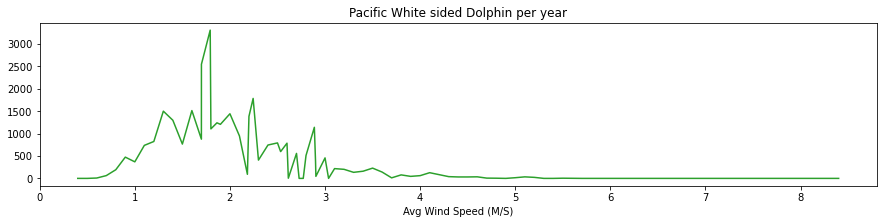

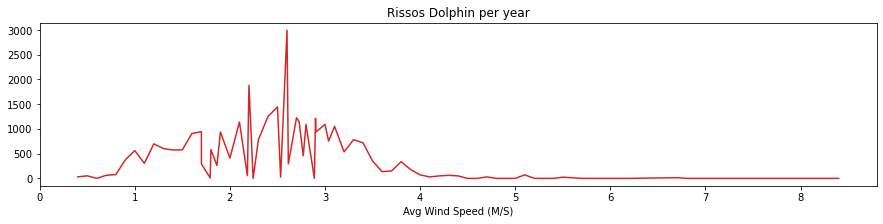

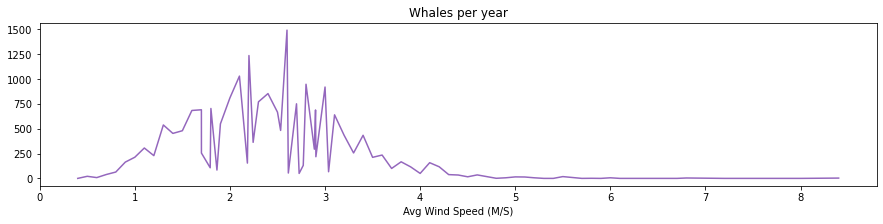

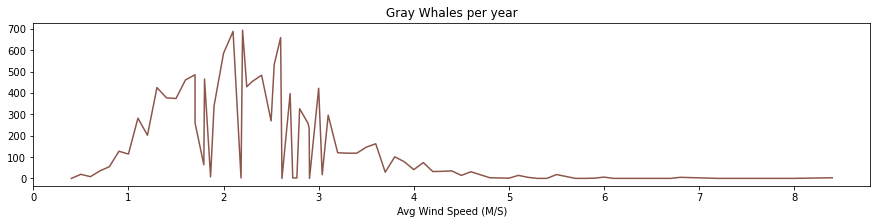

In [21]:
line_plot_animals_by_wind(df, col_names)


## Joint Plot

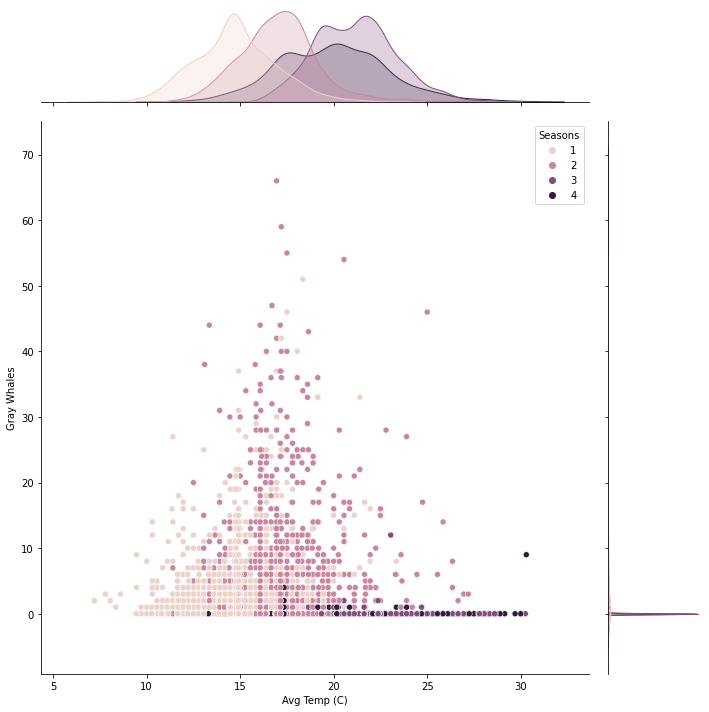

In [22]:

sns.jointplot(data=df, x="Avg Temp (C)", y="Gray Whales", hue="Seasons", height= 10)

## Heatmap

<AxesSubplot:>

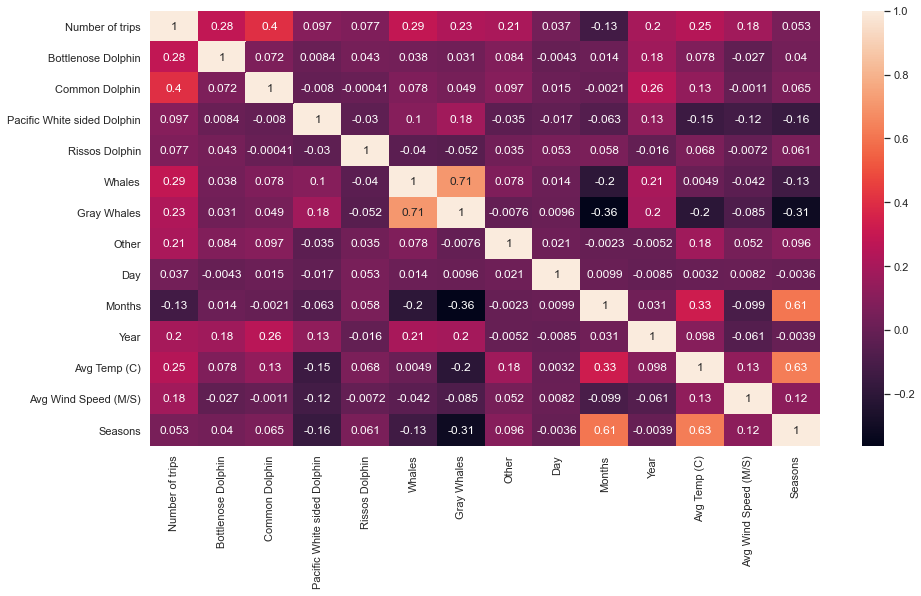

In [23]:
df1 = df.drop('Date',axis = 1)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data = df1.corr(), annot = True)

## Pie Chart

#### Binary Dataframe 

In [29]:
df_binary = pd.read_csv("Binary_FINAL_DF.csv")
df_binary = df_binary.iloc[:,2:]  ## ignoring double index
df_binary = df_binary.drop(['Day', 'Year'], axis=1)

In [30]:
def one_dim_plot(sr, plot_type, axis):
    sr.plot(kind=plot_type, ax = axis)
    
def get_frequent_elements(df, col_name):
    new_dataframe = df.copy()

    series_of_freq = new_dataframe[col_name].value_counts() # TOP FREQUENT ELEMENTS

    s = pd.Series(series_of_freq).sort_index(ascending = True)
    
    return s

def plot_frequent_elements(df, df_in_params):

    list_of_cols = df_in_params['col_name'].tolist()
    list_of_plots = df_in_params['plot_type'].tolist()
      
    fig, axes = plt.subplots(1,len(list_of_cols), figsize=(25,7))
    for i, col in enumerate (list_of_cols):
        freq_series = get_frequent_elements(df, col)
        one_dim_plot(freq_series, list_of_plots[i], axes[i])
        

In [31]:
df_params = pd.DataFrame({'plot_type': ['pie', 'pie', 'pie', 'pie'], 
                          'col_name': ['Rissos Dolphin', 'Gray Whales', 'Other',
                                       'Pacific White sided Dolphin']})
df_params2 = pd.DataFrame({'plot_type': ['pie', 'pie', 'pie',], 
                          'col_name': ['Bottlenose Dolphin', 'Common Dolphin','Whales']})




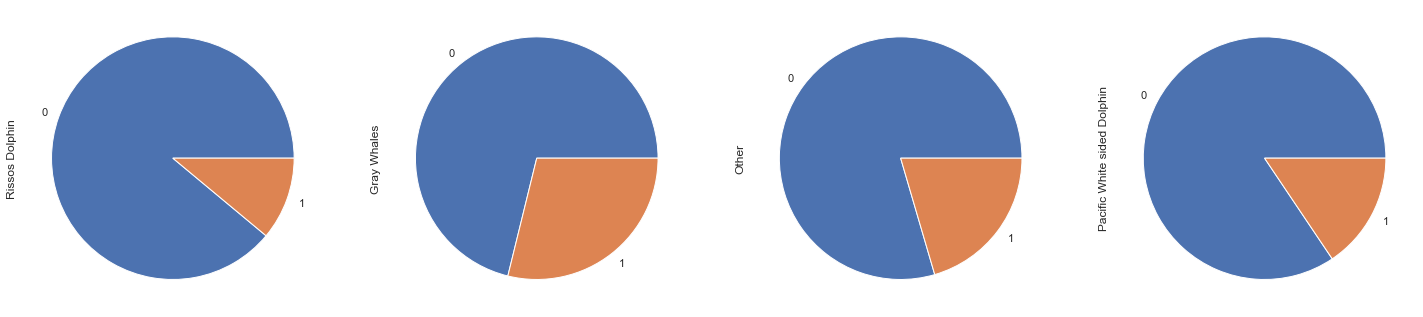

In [32]:
plot_frequent_elements(df_binary, df_params)


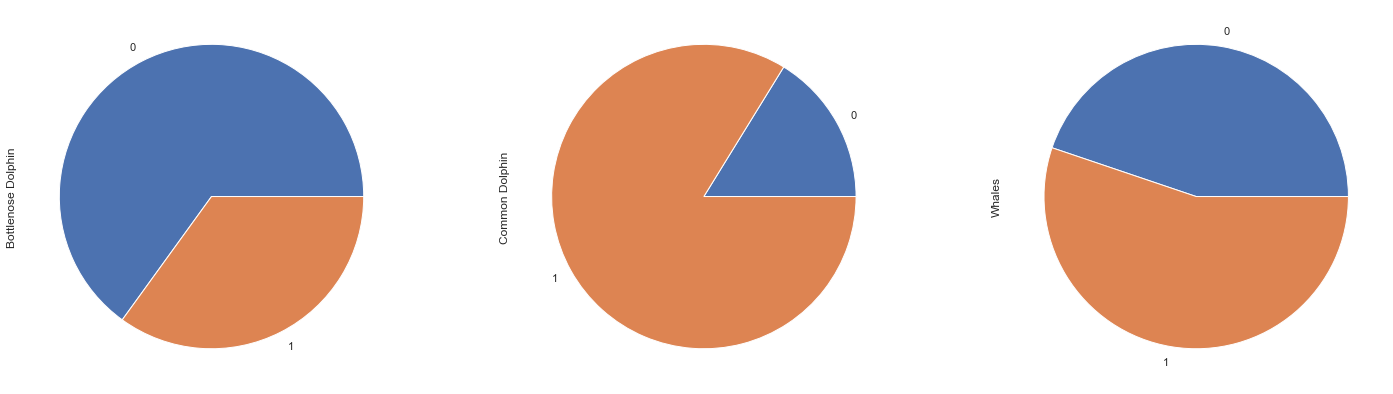

In [28]:
plot_frequent_elements(df_binary, df_params2)